In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, accuracy_score
np.random.seed(42)

In [19]:
# Define the path to the Excel file
path='/Users/lavanyakoduru/Desktop/data.xlsx'
df = pd.read_excel(path)
print(df)

            DATE_TIME   CB_FLOW  CB_PRESS  CB_TEMP  STEAM_FLOW  STEAM_TEMP  \
0      01-07-21 00:10  311727.0      3.15    129.0         4.0       213.0   
1      01-07-21 00:20  315163.0      3.16    129.0         4.0       209.0   
2      01-07-21 00:30  314595.0      3.16    128.0         4.0       205.0   
3      01-07-21 00:40  312465.0      3.16    127.0         4.0       200.0   
4      01-07-21 00:50  302981.0      3.11    126.0         4.0       194.0   
...               ...       ...       ...      ...         ...         ...   
25400  31-12-21 23:10  278198.0      2.75     76.0         2.0       189.0   
25401  31-12-21 23:20  286486.0      2.80     77.0         1.0       190.0   
25402  31-12-21 23:30  284500.0      2.81     77.0         0.0       191.0   
25403  31-12-21 23:40  284455.0      2.83     77.0         1.0       190.0   
25404  31-12-21 23:50  274728.0      2.73     77.0         2.0       189.0   

       STEAM_PRESS  O2_PRESS  O2_FLOW  O2_PER  ...  TOP_TEMP2  

In [20]:
k=df.columns
k

Index(['DATE_TIME', 'CB_FLOW', 'CB_PRESS', 'CB_TEMP', 'STEAM_FLOW',
       'STEAM_TEMP', 'STEAM_PRESS', 'O2_PRESS', 'O2_FLOW', 'O2_PER', 'PCI',
       'ATM_HUMID', 'HB_TEMP', 'HB_PRESS', 'TOP_PRESS', 'TOP_TEMP1',
       'TOP_TEMP2', 'TOP_TEMP3', 'TOP_TEMP4', 'TOP_SPRAY', 'TOP_TEMP',
       'TOP_PRESS_1', 'CO', 'CO2', 'H2', 'SKIN_TEMP_AVG'],
      dtype='object')

In [21]:
# Drop rows with missing values
df.dropna(inplace=True)

In [22]:
print(df.dtypes)

DATE_TIME         object
CB_FLOW          float64
CB_PRESS         float64
CB_TEMP          float64
STEAM_FLOW       float64
STEAM_TEMP       float64
STEAM_PRESS      float64
O2_PRESS         float64
O2_FLOW          float64
O2_PER           float64
PCI              float64
ATM_HUMID        float64
HB_TEMP          float64
HB_PRESS         float64
TOP_PRESS        float64
TOP_TEMP1        float64
TOP_TEMP2        float64
TOP_TEMP3        float64
TOP_TEMP4        float64
TOP_SPRAY        float64
TOP_TEMP         float64
TOP_PRESS_1      float64
CO               float64
CO2              float64
H2               float64
SKIN_TEMP_AVG    float64
dtype: object


In [23]:
data = {}
for i in df.columns:
    data[i] = df[i]
df1 = pd.DataFrame(data)
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format="%d-%m-%y %H:%M")
df1

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.940478
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.454476
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.579462
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.179791
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.728470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,31-12-21 23:10,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,116.0,108.0,122.0,0.2,111.0,1.0,21.90,20.25,3.10,65.923014
25401,31-12-21 23:20,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,113.0,105.0,119.0,0.2,110.0,1.0,22.09,20.14,3.04,64.321354
25402,31-12-21 23:30,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,116.0,108.0,115.0,0.1,110.0,1.0,22.04,20.20,2.99,64.253390
25403,31-12-21 23:40,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,119.0,113.0,121.0,0.2,115.0,1.0,22.03,20.27,3.09,63.478089


CB_FLOW         -0.318952
HB_TEMP         -0.262667
CO2             -0.193740
CB_PRESS        -0.157279
HB_PRESS        -0.137681
CB_TEMP         -0.091622
TOP_PRESS       -0.087016
STEAM_PRESS     -0.083982
STEAM_TEMP      -0.044612
TOP_PRESS_1     -0.030448
O2_PRESS        -0.020216
ATM_HUMID        0.018081
STEAM_FLOW       0.019650
O2_FLOW          0.094311
PCI              0.174658
CO               0.184494
O2_PER           0.232680
TOP_SPRAY        0.234175
H2               0.272222
TOP_TEMP3        0.568370
TOP_TEMP2        0.575460
TOP_TEMP4        0.576809
TOP_TEMP1        0.585560
TOP_TEMP         0.596779
SKIN_TEMP_AVG    1.000000
Name: SKIN_TEMP_AVG, dtype: float64


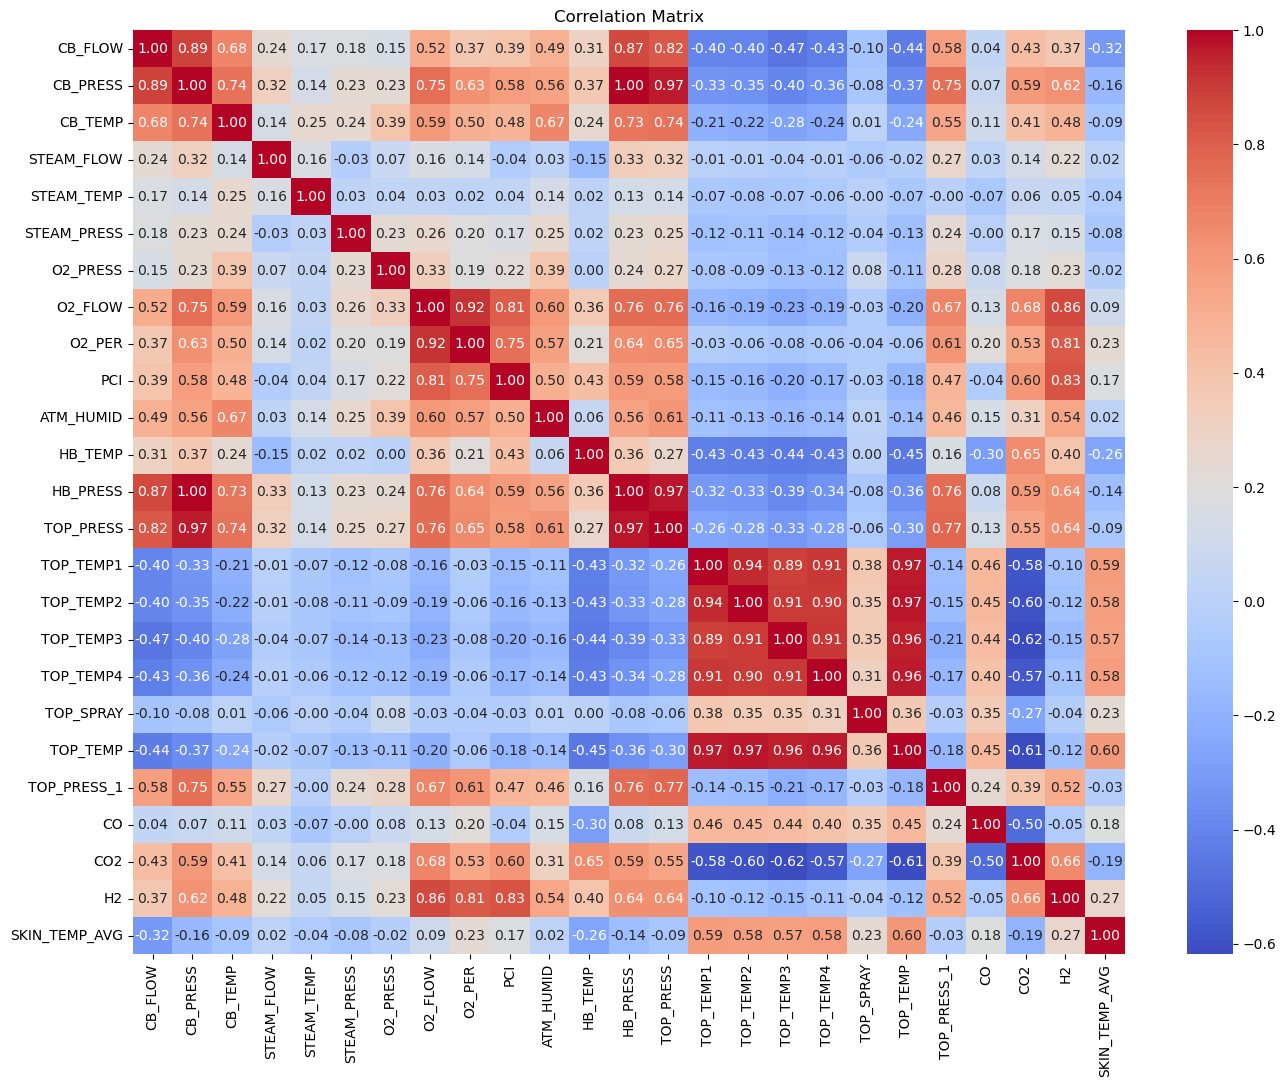

In [24]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

print(corr ['SKIN_TEMP_AVG'].sort_values(ascending=True))

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [25]:
# Assuming df is your original DataFrame
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"])

# Filter the DataFrame to include only rows where the time is exactly on the hour
filtered_df = df[df["DATE_TIME"].dt.minute == 0]
filtered_df = filtered_df[filtered_df["DATE_TIME"].dt.second == 0]


# Reset the index if necessary
filtered_df.reset_index(drop=True, inplace=True)

# Resulting DataFrame
new_df = filtered_df

new_df

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,2021-07-01 01:00:00,312520.0,3.20,126.0,4.0,189.0,3.39,3.25,7916.0,23.08,...,139.0,117.0,132.0,0.0,128.0,2.0,22.30,21.10,4.12,72.222703
1,2021-07-01 02:00:00,311177.0,3.21,126.0,4.0,191.0,3.40,3.26,7922.0,23.08,...,138.0,126.0,129.0,0.0,128.0,1.0,22.49,21.08,4.11,77.342288
2,2021-07-01 03:00:00,301825.0,3.17,127.0,4.0,190.0,3.36,3.21,7914.0,23.08,...,155.0,150.0,139.0,0.0,144.0,1.0,22.20,21.34,4.12,82.636160
3,2021-07-01 04:00:00,313514.0,3.27,124.0,6.0,192.0,3.48,3.32,8411.0,23.08,...,151.0,149.0,133.0,0.0,141.0,2.0,22.40,21.17,4.14,84.636354
4,2021-07-01 05:00:00,318428.0,3.21,127.0,6.0,189.0,3.43,3.27,8096.0,23.08,...,145.0,124.0,140.0,0.0,136.0,1.0,22.60,21.11,3.88,83.540342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,2021-12-31 19:00:00,278463.0,2.74,76.0,5.0,190.0,2.93,2.78,2901.0,22.33,...,133.0,127.0,126.0,0.1,127.0,1.0,22.82,20.48,3.40,72.821213
3575,2021-12-31 20:00:00,290690.0,2.75,76.0,4.0,191.0,2.95,2.80,2907.0,22.33,...,122.0,97.0,129.0,0.1,118.0,1.0,22.78,20.28,3.28,72.969667
3576,2021-12-31 21:00:00,280826.0,2.68,76.0,2.0,192.0,2.86,2.72,2900.0,22.30,...,132.0,119.0,136.0,0.1,129.0,1.0,22.42,20.33,3.08,70.699026
3577,2021-12-31 22:00:00,288396.0,2.83,76.0,3.0,192.0,3.01,2.87,2901.0,22.30,...,123.0,110.0,126.0,0.1,119.0,1.0,22.49,20.35,3.12,71.575490


In [26]:
# Create lag features for future skin temperature predictions
new_df['Next_1hr'] = new_df['SKIN_TEMP_AVG'].shift(-1)
new_df['Next_2hr'] = new_df['SKIN_TEMP_AVG'].shift(-2)
new_df['Next_3hr'] = new_df['SKIN_TEMP_AVG'].shift(-3)
new_df['Next_4hr'] = new_df['SKIN_TEMP_AVG'].shift(-4)
# Drop rows with NaN values created by shifting
new_df.dropna(inplace=True)

# Select the lagged features
lagged_features = ['Next_1hr', 'Next_2hr', 'Next_3hr', 'Next_4hr']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the lagged features
scaled_lagged_features = scaler.fit_transform(new_df[lagged_features])

# Adjust the scaled features to have a mean of 1
scaled_lagged_features = scaled_lagged_features + 1 - np.mean(scaled_lagged_features, axis=0)

# Replace the original lagged features with the scaled ones
new_df[lagged_features] = scaled_lagged_features

# Save the modified DataFrame to a new Excel file
output_path = "/Users/lavanyakoduru/Desktop/demo.xlsx"
new_df.to_excel(output_path, index=False)

# Load the data from the new Excel file
df_new = pd.read_excel(output_path)

# Display the new DataFrame
new_df

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,Next_1hr,Next_2hr,Next_3hr,Next_4hr
0,2021-07-01 01:00:00,312520.0,3.20,126.0,4.0,189.0,3.39,3.25,7916.0,23.08,...,128.0,2.0,22.30,21.10,4.12,72.222703,1.406191,1.617993,1.698145,1.654543
1,2021-07-01 02:00:00,311177.0,3.21,126.0,4.0,191.0,3.40,3.26,7922.0,23.08,...,128.0,1.0,22.49,21.08,4.11,77.342288,1.617906,1.697987,1.654309,1.532683
2,2021-07-01 03:00:00,301825.0,3.17,127.0,4.0,190.0,3.36,3.21,7914.0,23.08,...,144.0,1.0,22.20,21.34,4.12,82.636160,1.697898,1.654154,1.532458,1.634421
3,2021-07-01 04:00:00,313514.0,3.27,124.0,6.0,192.0,3.48,3.32,8411.0,23.08,...,141.0,2.0,22.40,21.17,4.14,84.636354,1.654066,1.532308,1.634190,1.326267
4,2021-07-01 05:00:00,318428.0,3.21,127.0,6.0,189.0,3.43,3.27,8096.0,23.08,...,136.0,1.0,22.60,21.11,3.88,83.540342,1.532223,1.634035,1.326056,1.367311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,2021-12-31 15:00:00,283309.0,2.77,78.0,2.0,192.0,2.94,2.81,2881.0,22.26,...,118.0,1.0,22.33,20.10,2.96,80.174008,1.491601,1.459626,1.273916,1.225801
3571,2021-12-31 16:00:00,282397.0,2.83,77.0,3.0,190.0,3.00,2.87,2917.0,22.28,...,140.0,1.0,22.33,20.26,3.15,79.477945,1.459543,1.273779,1.225597,1.231738
3572,2021-12-31 17:00:00,277292.0,2.78,77.0,4.0,190.0,2.97,2.82,2913.0,22.32,...,144.0,1.0,22.44,20.51,3.22,78.676326,1.273699,1.225462,1.231534,1.140918
3573,2021-12-31 18:00:00,289341.0,2.78,76.0,5.0,191.0,2.98,2.82,2900.0,22.31,...,118.0,1.0,22.43,20.40,3.30,74.029351,1.225383,1.231399,1.140719,1.175974


In [27]:
# predicting first hour
df1 = new_df.drop(columns = ["SKIN_TEMP_AVG"])
df1

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,Next_1hr,Next_2hr,Next_3hr,Next_4hr
0,2021-07-01 01:00:00,312520.0,3.20,126.0,4.0,189.0,3.39,3.25,7916.0,23.08,...,0.0,128.0,2.0,22.30,21.10,4.12,1.406191,1.617993,1.698145,1.654543
1,2021-07-01 02:00:00,311177.0,3.21,126.0,4.0,191.0,3.40,3.26,7922.0,23.08,...,0.0,128.0,1.0,22.49,21.08,4.11,1.617906,1.697987,1.654309,1.532683
2,2021-07-01 03:00:00,301825.0,3.17,127.0,4.0,190.0,3.36,3.21,7914.0,23.08,...,0.0,144.0,1.0,22.20,21.34,4.12,1.697898,1.654154,1.532458,1.634421
3,2021-07-01 04:00:00,313514.0,3.27,124.0,6.0,192.0,3.48,3.32,8411.0,23.08,...,0.0,141.0,2.0,22.40,21.17,4.14,1.654066,1.532308,1.634190,1.326267
4,2021-07-01 05:00:00,318428.0,3.21,127.0,6.0,189.0,3.43,3.27,8096.0,23.08,...,0.0,136.0,1.0,22.60,21.11,3.88,1.532223,1.634035,1.326056,1.367311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,2021-12-31 15:00:00,283309.0,2.77,78.0,2.0,192.0,2.94,2.81,2881.0,22.26,...,0.1,118.0,1.0,22.33,20.10,2.96,1.491601,1.459626,1.273916,1.225801
3571,2021-12-31 16:00:00,282397.0,2.83,77.0,3.0,190.0,3.00,2.87,2917.0,22.28,...,0.1,140.0,1.0,22.33,20.26,3.15,1.459543,1.273779,1.225597,1.231738
3572,2021-12-31 17:00:00,277292.0,2.78,77.0,4.0,190.0,2.97,2.82,2913.0,22.32,...,0.1,144.0,1.0,22.44,20.51,3.22,1.273699,1.225462,1.231534,1.140918
3573,2021-12-31 18:00:00,289341.0,2.78,76.0,5.0,191.0,2.98,2.82,2900.0,22.31,...,0.1,118.0,1.0,22.43,20.40,3.30,1.225383,1.231399,1.140719,1.175974


In [28]:
# predicting first hour
df11= df1.drop(columns = ["Next_2hr","Next_3hr","Next_4hr","DATE_TIME"])
df11

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,Next_1hr
0,312520.0,3.20,126.0,4.0,189.0,3.39,3.25,7916.0,23.08,36.0,...,139.0,117.0,132.0,0.0,128.0,2.0,22.30,21.10,4.12,1.406191
1,311177.0,3.21,126.0,4.0,191.0,3.40,3.26,7922.0,23.08,33.0,...,138.0,126.0,129.0,0.0,128.0,1.0,22.49,21.08,4.11,1.617906
2,301825.0,3.17,127.0,4.0,190.0,3.36,3.21,7914.0,23.08,30.0,...,155.0,150.0,139.0,0.0,144.0,1.0,22.20,21.34,4.12,1.697898
3,313514.0,3.27,124.0,6.0,192.0,3.48,3.32,8411.0,23.08,30.0,...,151.0,149.0,133.0,0.0,141.0,2.0,22.40,21.17,4.14,1.654066
4,318428.0,3.21,127.0,6.0,189.0,3.43,3.27,8096.0,23.08,27.0,...,145.0,124.0,140.0,0.0,136.0,1.0,22.60,21.11,3.88,1.532223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,283309.0,2.77,78.0,2.0,192.0,2.94,2.81,2881.0,22.26,11.0,...,127.0,106.0,119.0,0.1,118.0,1.0,22.33,20.10,2.96,1.491601
3571,282397.0,2.83,77.0,3.0,190.0,3.00,2.87,2917.0,22.28,12.0,...,150.0,138.0,139.0,0.1,140.0,1.0,22.33,20.26,3.15,1.459543
3572,277292.0,2.78,77.0,4.0,190.0,2.97,2.82,2913.0,22.32,8.0,...,154.0,139.0,146.0,0.1,144.0,1.0,22.44,20.51,3.22,1.273699
3573,289341.0,2.78,76.0,5.0,191.0,2.98,2.82,2900.0,22.31,9.0,...,129.0,109.0,120.0,0.1,118.0,1.0,22.43,20.40,3.30,1.225383


In [31]:
from sklearn.model_selection import train_test_split
X = df11.drop(columns = ["Next_1hr"])
y = df11["Next_1hr"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
model_for_1hr = LinearRegression()
model_for_1hr.fit(X_train, y_train)
model_for_1hr.score(X_test, y_test)

0.5103000481474091

In [33]:
from sklearn.tree import DecisionTreeRegressor
model_for_1hr_dtree = DecisionTreeRegressor(random_state=42)
model_for_1hr_dtree.fit(X_train, y_train)
model_for_1hr_dtree.score(X_test, y_test)

0.40521984865340255

In [34]:
from sklearn.neighbors import KNeighborsRegressor
model_for_1hr_knn = KNeighborsRegressor()
model_for_1hr_knn.fit(X_train, y_train)
model_for_1hr_knn.score(X_train, y_train)

0.5284115378697456

In [35]:
from sklearn.ensemble import RandomForestRegressor


model_for_1hr_rf = RandomForestRegressor(random_state=42)
model_for_1hr_rf.fit(X_train, y_train)
model_for_1hr_rf.score(X_train, y_train)

0.9654789617876448

In [36]:
from sklearn.ensemble import BaggingRegressor
model_for_1hr_bag = BaggingRegressor(random_state=42)
model_for_1hr_bag.fit(X_train, y_train)
model_for_1hr_bag.score(X_train, y_train)

0.9512501872238678

In [37]:
from sklearn.ensemble import AdaBoostRegressor

model_for_1hr_ada = AdaBoostRegressor(random_state=42)
model_for_1hr_ada.fit(X_train, y_train)
model_for_1hr_ada.score(X_train, y_train)

0.5039338852168742

In [38]:
import xgboost as xgb
model_for_1hr_xgb = xgb.XGBRegressor(random_state=42)
model_for_1hr_xgb.fit(X_train, y_train)
model_for_1hr_xgb.score(X_train, y_train)

0.9931956950452309

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance
y_pred = model_for_1hr_xgb.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

# Check for negative values in y_test and y_pred
if (y_test < 0).any() or (y_pred < 0).any():
    # Add a constant to make values non-negative
    min_value = min(y_test.min(), y_pred.min())
    y_test += abs(min_value) + 1
    y_pred += abs(min_value) + 1

# Compute the mean squared logarithmic error
print("msle",mean_squared_log_error(y_test, y_pred))
print("mpd",mean_poisson_deviance(y_test, y_pred))
# Check for non-positive values in y_test and y_pred
if (y_test <= 0).any() or (y_pred <= 0).any():
    # Adjust non-positive values to be strictly positive
    y_test_positive = np.maximum(y_test, 1e-10)  # Small epsilon added to avoid zero
    y_pred_positive = np.maximum(y_pred, 1e-10)  # Small epsilon added to avoid zero

    # Calculate mean gamma deviance with adjusted values
    mge = mean_gamma_deviance(y_test_positive, y_pred_positive)
else:
    # Calculate mean gamma deviance directly
    mge = mean_gamma_deviance(y_test, y_pred)
print("mge", mge)

mse 0.21789779029417716
r2 0.7672182904717033
mae 0.33405417654253644
mape 3.6809349244953506
msle 0.017914169305826955
mpd 0.08644819488794103
mge 0.03792337691039731


In [40]:
df12 = df1.drop(columns = ["Next_3hr","Next_4hr","DATE_TIME"])
df12
X = df12.drop(columns = ["Next_2hr"])
y = df12["Next_2hr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model_for_2hr = LinearRegression()
model_for_2hr.fit(X_train, y_train)
model_for_2hr.score(X_test, y_test)

0.9023200814148985

In [42]:
from sklearn.ensemble import GradientBoostingRegressor


model_for_2hr_gb = GradientBoostingRegressor(random_state=42)
model_for_2hr_gb.fit(X_train, y_train)
print(model_for_2hr_gb.score(X_train, y_train))


0.9585340496222075


In [43]:
model_for_2hr_rf = RandomForestRegressor(random_state=42)
model_for_2hr_rf.fit(X_train, y_train)
model_for_2hr_rf.score(X_train, y_train)

0.9843586750221937

In [44]:
model_for_2hr_bag = BaggingRegressor(random_state=42)
model_for_2hr_bag.fit(X_train, y_train)
model_for_2hr_bag.score(X_train, y_train)

0.9799654740826886

In [45]:
model_for_2hr_ada = AdaBoostRegressor(random_state=42)
model_for_2hr_ada.fit(X_train, y_train)
model_for_2hr_ada.score(X_train, y_train)

0.9028424645815636

In [46]:
model_for_2hr_xgb = xgb.XGBRegressor(random_state=42)
model_for_2hr_xgb.fit(X_train, y_train)
model_for_2hr_xgb.score(X_train, y_train)

0.9977856440010666

In [47]:
y_pred = model_for_2hr_xgb.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

# Check for negative values in y_test and y_pred
if (y_test < 0).any() or (y_pred < 0).any():
    # Add a constant to make values non-negative
    min_value = min(y_test.min(), y_pred.min())
    y_test += abs(min_value) + 1
    y_pred += abs(min_value) + 1

# Compute the mean squared logarithmic error
print("msle",mean_squared_log_error(y_test, y_pred))
print("mpd",mean_poisson_deviance(y_test, y_pred))
# Check for non-positive values in y_test and y_pred
if (y_test <= 0).any() or (y_pred <= 0).any():
    # Adjust non-positive values to be strictly positive
    y_test_positive = np.maximum(y_test, 1e-10)  # Small epsilon added to avoid zero
    y_pred_positive = np.maximum(y_pred, 1e-10)  # Small epsilon added to avoid zero

    # Calculate mean gamma deviance with adjusted values
    mge = mean_gamma_deviance(y_test_positive, y_pred_positive)
else:
    # Calculate mean gamma deviance directly
    mge = mean_gamma_deviance(y_test, y_pred)
print("mge", mge)

mse 0.11555509205937144
r2 0.8834173329574999
mae 0.200604992740169
mape 1.2849587744547337
msle 0.005921647697613521
mpd 0.03241902690791312
mge 0.01202741516347912


In [48]:
df13 = df1.drop(columns = ["Next_4hr","DATE_TIME"])
df13

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,Next_1hr,Next_2hr,Next_3hr
0,312520.0,3.20,126.0,4.0,189.0,3.39,3.25,7916.0,23.08,36.0,...,132.0,0.0,128.0,2.0,22.30,21.10,4.12,1.406191,1.617993,1.698145
1,311177.0,3.21,126.0,4.0,191.0,3.40,3.26,7922.0,23.08,33.0,...,129.0,0.0,128.0,1.0,22.49,21.08,4.11,1.617906,1.697987,1.654309
2,301825.0,3.17,127.0,4.0,190.0,3.36,3.21,7914.0,23.08,30.0,...,139.0,0.0,144.0,1.0,22.20,21.34,4.12,1.697898,1.654154,1.532458
3,313514.0,3.27,124.0,6.0,192.0,3.48,3.32,8411.0,23.08,30.0,...,133.0,0.0,141.0,2.0,22.40,21.17,4.14,1.654066,1.532308,1.634190
4,318428.0,3.21,127.0,6.0,189.0,3.43,3.27,8096.0,23.08,27.0,...,140.0,0.0,136.0,1.0,22.60,21.11,3.88,1.532223,1.634035,1.326056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,283309.0,2.77,78.0,2.0,192.0,2.94,2.81,2881.0,22.26,11.0,...,119.0,0.1,118.0,1.0,22.33,20.10,2.96,1.491601,1.459626,1.273916
3571,282397.0,2.83,77.0,3.0,190.0,3.00,2.87,2917.0,22.28,12.0,...,139.0,0.1,140.0,1.0,22.33,20.26,3.15,1.459543,1.273779,1.225597
3572,277292.0,2.78,77.0,4.0,190.0,2.97,2.82,2913.0,22.32,8.0,...,146.0,0.1,144.0,1.0,22.44,20.51,3.22,1.273699,1.225462,1.231534
3573,289341.0,2.78,76.0,5.0,191.0,2.98,2.82,2900.0,22.31,9.0,...,120.0,0.1,118.0,1.0,22.43,20.40,3.30,1.225383,1.231399,1.140719


In [49]:
X = df13.drop(columns = ["Next_3hr"])
y = df13["Next_3hr"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model_for_3hr_gb = GradientBoostingRegressor(random_state=42)
model_for_3hr_gb.fit(X_train, y_train)
model_for_3hr_gb.score(X_train, y_train)

0.9579564335849808

In [51]:
model_for_3hr_rf = RandomForestRegressor(random_state=42)
model_for_3hr_rf.fit(X_train, y_train)
model_for_3hr_rf.score(X_train, y_train)

0.9834909667235658

In [52]:
model_for_3hr_bag = BaggingRegressor(random_state=42)
model_for_3hr_bag.fit(X_train, y_train)
model_for_3hr_bag.score(X_train, y_train)

0.9773416081719257

In [53]:
model_for_3hr_xgb = xgb.XGBRegressor(random_state=42)
model_for_3hr_xgb.fit(X_train, y_train)
model_for_3hr_xgb.score(X_train, y_train)

0.9976438859186674

In [54]:
y_pred = model_for_3hr_xgb.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

# Check for negative values in y_test and y_pred
if (y_test < 0).any() or (y_pred < 0).any():
    # Add a constant to make values non-negative
    min_value = min(y_test.min(), y_pred.min())
    y_test += abs(min_value) + 1
    y_pred += abs(min_value) + 1

# Compute the mean squared logarithmic error
print("msle",mean_squared_log_error(y_test, y_pred))
print("mpd",mean_poisson_deviance(y_test, y_pred))
# Check for non-positive values in y_test and y_pred
if (y_test <= 0).any() or (y_pred <= 0).any():
    # Adjust non-positive values to be strictly positive
    y_test_positive = np.maximum(y_test, 1e-10)  # Small epsilon added to avoid zero
    y_pred_positive = np.maximum(y_pred, 1e-10)  # Small epsilon added to avoid zero

    # Calculate mean gamma deviance with adjusted values
    mge = mean_gamma_deviance(y_test_positive, y_pred_positive)
else:
    # Calculate mean gamma deviance directly
    mge = mean_gamma_deviance(y_test, y_pred)
print("mge", mge)

mse 0.11203028784074634
r2 0.8815153158818044
mae 0.1999920226867496
mape 0.5630839631105141
msle 0.006288502732853527
mpd 0.03364484298941175
mge 0.01250368747649094


In [55]:
df14 = df1.drop(columns = ["DATE_TIME"])
df14

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,Next_1hr,Next_2hr,Next_3hr,Next_4hr
0,312520.0,3.20,126.0,4.0,189.0,3.39,3.25,7916.0,23.08,36.0,...,0.0,128.0,2.0,22.30,21.10,4.12,1.406191,1.617993,1.698145,1.654543
1,311177.0,3.21,126.0,4.0,191.0,3.40,3.26,7922.0,23.08,33.0,...,0.0,128.0,1.0,22.49,21.08,4.11,1.617906,1.697987,1.654309,1.532683
2,301825.0,3.17,127.0,4.0,190.0,3.36,3.21,7914.0,23.08,30.0,...,0.0,144.0,1.0,22.20,21.34,4.12,1.697898,1.654154,1.532458,1.634421
3,313514.0,3.27,124.0,6.0,192.0,3.48,3.32,8411.0,23.08,30.0,...,0.0,141.0,2.0,22.40,21.17,4.14,1.654066,1.532308,1.634190,1.326267
4,318428.0,3.21,127.0,6.0,189.0,3.43,3.27,8096.0,23.08,27.0,...,0.0,136.0,1.0,22.60,21.11,3.88,1.532223,1.634035,1.326056,1.367311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,283309.0,2.77,78.0,2.0,192.0,2.94,2.81,2881.0,22.26,11.0,...,0.1,118.0,1.0,22.33,20.10,2.96,1.491601,1.459626,1.273916,1.225801
3571,282397.0,2.83,77.0,3.0,190.0,3.00,2.87,2917.0,22.28,12.0,...,0.1,140.0,1.0,22.33,20.26,3.15,1.459543,1.273779,1.225597,1.231738
3572,277292.0,2.78,77.0,4.0,190.0,2.97,2.82,2913.0,22.32,8.0,...,0.1,144.0,1.0,22.44,20.51,3.22,1.273699,1.225462,1.231534,1.140918
3573,289341.0,2.78,76.0,5.0,191.0,2.98,2.82,2900.0,22.31,9.0,...,0.1,118.0,1.0,22.43,20.40,3.30,1.225383,1.231399,1.140719,1.175974


In [56]:
X = df14.drop(columns = ["Next_4hr"])
y = df14["Next_4hr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_for_4hr = xgb.XGBRegressor()

model_for_4hr.fit(X_train, y_train)
model_for_4hr.score(X_train, y_train)

0.9981254266139543

In [57]:
y_pred = model_for_4hr.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

# Check for negative values in y_test and y_pred
if (y_test < 0).any() or (y_pred < 0).any():
    # Add a constant to make values non-negative
    min_value = min(y_test.min(), y_pred.min())
    y_test += abs(min_value) + 1
    y_pred += abs(min_value) + 1

# Compute the mean squared logarithmic error
print("msle",mean_squared_log_error(y_test, y_pred))

print("mpd",mean_poisson_deviance(y_test, y_pred))
# Check for non-positive values in y_test and y_pred
if (y_test <= 0).any() or (y_pred <= 0).any():
    # Adjust non-positive values to be strictly positive
    y_test_positive = np.maximum(y_test, 1e-10)  # Small epsilon added to avoid zero
    y_pred_positive = np.maximum(y_pred, 1e-10)  # Small epsilon added to avoid zero

    # Calculate mean gamma deviance with adjusted values
    mge = mean_gamma_deviance(y_test_positive, y_pred_positive)
else:
    # Calculate mean gamma deviance directly
    mge = mean_gamma_deviance(y_test, y_pred)
print("mge", mge)

mse 0.13321878333550818
r2 0.8640758394422651
mae 0.2077940511822909
mape 0.6565204638582129
msle 0.007185800668390718
mpd 0.03790387416552957
mge 0.01426162555911436


In [58]:
model_1 = model_for_1hr_xgb 
model_2 = model_for_2hr_xgb
model_3 = model_for_3hr_xgb
model_4 = model_for_4hr

In [60]:
import pickle
model_names=['model_1' ,'model_2', 'model_3', 'model_4']
for name in model_names:
    model=globals()[name] 
    with open(f'{name}.pkl','wb') as f:
        pickle.dump(model,f)